In [ ]:
from google.colab import files
uploaded = files.upload()


Saving emails.csv to emails.csv


In [ ]:
import pandas as pd

df = pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#✅ Step 2 — Drop useless column

df = df.drop(columns=['Email No.'])

# Select X (inputs) and y (output)
X = df.drop(columns=['Prediction'])  # all word frequency columns
y = df['Prediction']                 # target column (1 = spam, 0 = not spam)


In [ ]:
#✅ Step 3 — Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2 , random_state=42
)

In [ ]:
#✅ Step 4 — Train KNN model

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)



KNeighborsClassifier()

In [ ]:
#✅ Step 5 — Train SVM model
from sklearn.svm import SVC

model_svm = SVC(kernel = 'linear')
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#✅ Step 6 — Evaluate both models

from sklearn.metrics import accuracy_score , classification_report

# KNN prediction
y_pred_knn = model_knn.predict(X_test)

# SVM predictions
y_pred_svm = model_svm.predict(X_test)

print("=== KNN model ===")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("\n=== SVM model ===")
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

=== KNN model ===
Accuracy:  0.8628019323671497
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.83      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.85      0.84      1035
weighted avg       0.87      0.86      0.87      1035


=== SVM model ===
Accuracy:  0.9594202898550724
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



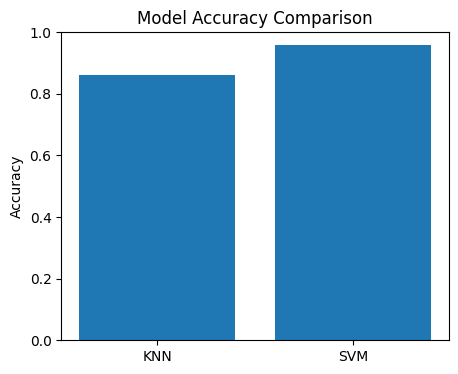

In [ ]:
# OPTIONAL

# Accuracies you already calculated
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Plot bar graph
models = ['KNN', 'SVM']
accuracies = [accuracy_knn, accuracy_svm]

plt.figure(figsize=(5,4))
plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)  # accuracy range is 0 to 1
plt.show()
